Model evaluation is a critical step in assessing the performance and reliability of a classifier model. It involves measuring how well the model performs on unseen data and understanding its strengths and weaknesses. Here's a comprehensive description of model evaluation for classifier models:

1. Performance Metrics:
Accuracy: The proportion of correctly classified instances out of the total instances.
Precision: The proportion of true positive predictions among all positive predictions.
Recall (Sensitivity): The proportion of true positive predictions among all actual positives.
F1-score: The harmonic mean of precision and recall, which balances between precision and recall.
Confusion Matrix: A matrix showing the counts of true positive, true negative, false positive, and false negative predictions.
ROC Curve: Receiver Operating Characteristic curve showing the trade-off between true positive rate and false positive rate.
AUC-ROC: Area Under the ROC Curve, which measures the model's ability to distinguish between classes.
Precision-Recall Curve: A curve showing the trade-off between precision and recall at different classification thresholds.

2. Model Evaluation Process:   
Model Prediction: Use the trained classifier model to make predictions on the testing set.
Calculate Performance Metrics: Compute accuracy, precision, recall, F1-score, and other relevant metrics using the predicted labels and true labels from the testing set.
Visualize Results: Plot the confusion matrix, ROC curve, and precision-recall curve to gain insights into the model's performance.
Adjust Threshold (if necessary): If the classifier model outputs probabilities, adjust the classification threshold to optimize the desired metric (e.g., precision, recall).
Cross-Validation: Perform k-fold cross-validation to assess the model's robustness and generalization ability.

3. Interpretation and Improvement:
Interpret Results: Analyze the performance metrics and visualizations to understand the classifier model's strengths and weaknesses.
Model Improvement: Iterate on the model by fine-tuning hyperparameters, feature engineering, or trying different algorithms to improve performance.
Feature Importance: Assess the importance of input features in making predictions using techniques like permutation importance or feature importance plots.

4. Business Impact:
Decision Making: Use the insights from model evaluation to make informed decisions about deploying the model in production or making changes to the data or model architecture.
Monitoring and Maintenance: Continuously monitor the model's performance in the production environment and update it as needed to ensure its effectiveness over time.

In [1]:
#Import Required Libaray 
from sklearn.metrics import accuracy_score ,classification_report,confusion_matrix,roc_auc_score,precision_score,recall_score
from sklearn.metrics import f1_score,roc_curve,precision_recall_curve
                            
import os
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
# Get the current directory
current_dir = os.getcwd()

# Get the parent directory (one level up)
current_dir = os.path.dirname(current_dir)

# Get the parent directory (one level up)
current_dir = os.path.dirname(current_dir)

# Get the parent directory (one level up)
parent_dir = os.path.dirname(current_dir)

# Print the parent directory
print("Parent Directory:", parent_dir)

Parent Directory: E:\upgrade_capston_project-main


In [3]:
preprocessed_data_dir = parent_dir+'/datasets/processed_dataset/'
model_dir = parent_dir+'/models/'

In [4]:
# Load X_test from file
with open(os.path.join(preprocessed_data_dir,'X_test.pkl'), 'rb') as f:
    X_test = pickle.load(f)
    
# Load y_test from file
with open(os.path.join(preprocessed_data_dir,'y_test.pkl'), 'rb') as f:
    y_test = pickle.load(f)

In [5]:
# Load the saved model from file
with open(os.path.join(model_dir,'xgbClassifier.pkl'), 'rb') as f:
    xgb_classifier = pickle.load(f)

In [6]:
# Prediction on test data with the help of trained model
y_pred = xgb_classifier.predict(X_test)

In [7]:
y_test_n = y_test.copy()

In [8]:
# Replace all occurrences defective as 0 and good as 1
for i in range(len(y_test)):
    if y_test_n[i]=='defective' : 
        y_test_n[i] = 0
    else:
        y_test_n[i] = 1

In [9]:
# Calculate performance metrics
accuracy = accuracy_score(y_test_n, y_pred)
precision = precision_score(y_test_n, y_pred)
recall = recall_score(y_test_n, y_pred)
f1 = f1_score(y_test_n, y_pred)
conf_matrix = confusion_matrix(y_test_n, y_pred)
roc_auc = roc_auc_score(y_test_n, y_pred)
fpr, tpr, _ = roc_curve(y_test_n, y_pred)
precision, recall, _ = precision_recall_curve(y_test_n, y_pred)

In [10]:
# Print performance metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:\n", conf_matrix)
print("ROC AUC Score:", roc_auc)

Accuracy: 0.7661290322580645
Precision: [0.44086022 0.76923077 1.        ]
Recall: [1.         0.67073171 0.        ]
F1-score: 0.7166123778501629
Confusion Matrix:
 [[175  33]
 [ 54 110]]
ROC AUC Score: 0.7560389305816136


In [11]:
print(classification_report(y_test_n, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.84      0.80       208
           1       0.77      0.67      0.72       164

    accuracy                           0.77       372
   macro avg       0.77      0.76      0.76       372
weighted avg       0.77      0.77      0.76       372



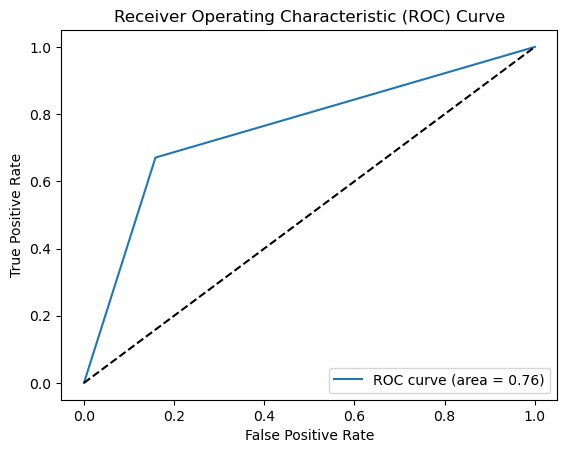

In [12]:
# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.savefig(parent_dir+'\\visuals\\xgb_ROC_Curve')
plt.show()

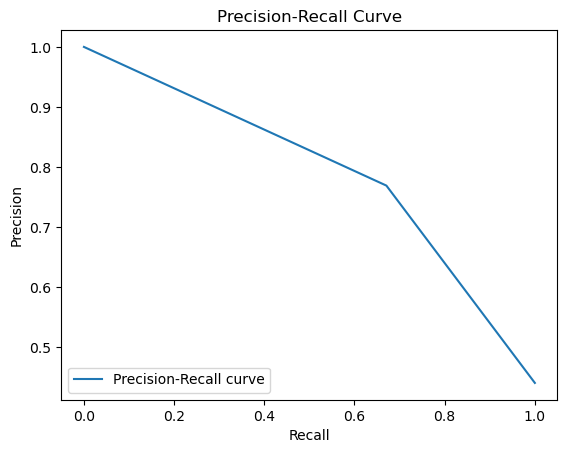

In [13]:
# Plot Precision-Recall Curve
plt.figure()
plt.plot(recall, precision, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.savefig(parent_dir+'\\visuals\\xgb_Precision-Recall Curve')
plt.show()

In [14]:
class_names = ['defective','good']

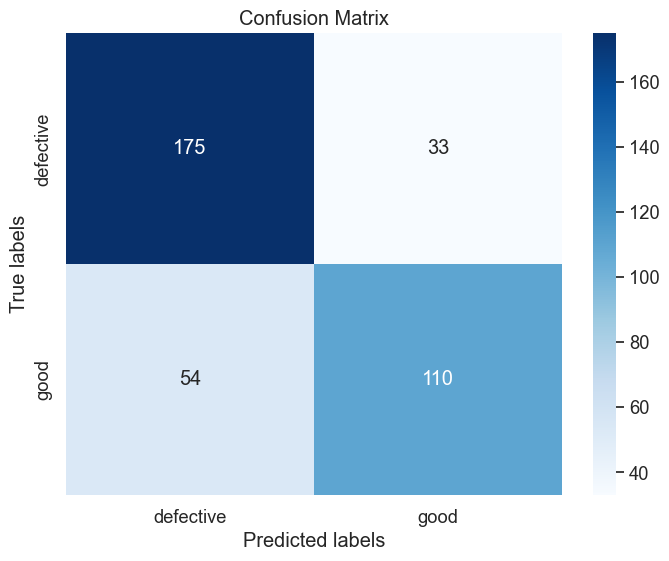

In [15]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust font size
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt='g', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.savefig(parent_dir+'\\visuals\\xgb_Confusion Matrix')
plt.show()

Interpretation and Improvement:

XGB is performing well with 77 % accuracy  , we can improve our model performence with merge with Deeplearning algorithms .

Business Impact : Identifying the Good and Defective tyres are very important aspect of currrent era as these days teh vehicles are increased 
and most of the people are used it for transport , so in term of safty of human being its good to identity the issues on time and get rid 
from any bad incidents.

Good tires are critical for safe and efficient operation of vehicles. Here are some key reasons why having good tires is important:

Safety: Tires are the only contact point between the vehicle and the road surface. Good tires provide optimal traction, which is essential for maintaining control of the vehicle, especially during braking, accelerating, and cornering. Tires with sufficient tread depth and proper inflation help prevent skidding, hydroplaning, and loss of control, reducing the risk of accidents.

Handling and Stability: Quality tires contribute to better handling and stability of the vehicle. They provide responsive steering and improved cornering performance, allowing drivers to maneuver safely and confidently, especially in challenging road conditions such as wet or slippery surfaces.

Braking Distance: Tires play a crucial role in braking performance. Good tires with adequate tread depth and optimal grip reduce the braking distance, enabling the vehicle to stop more quickly and effectively in emergency situations, thereby enhancing overall safety on the road.

Fuel Efficiency: Properly maintained tires can improve fuel efficiency. Low rolling resistance tires reduce the energy required to propel the vehicle forward, resulting in lower fuel consumption and reduced carbon emissions. By ensuring tires are properly inflated and aligned, drivers can maximize fuel efficiency and save money on fuel costs.

Comfort and Ride Quality: Quality tires contribute to a smoother and more comfortable ride. They help dampen road vibrations and reduce noise, providing a quieter and more pleasant driving experience for occupants. Additionally, tires with good shock absorption properties enhance ride quality by minimizing bumps and jolts on uneven road surfaces.

Longevity and Durability: Investing in high-quality tires can result in longer tread life and extended tire longevity. Quality tires are designed to withstand wear and tear, punctures, and road hazards, resulting in fewer tire replacements and maintenance costs over time.

All-Weather Performance: Good tires are designed to perform well in various weather conditions, including dry, wet, and snowy conditions. All-season or winter tires with specialized tread patterns and rubber compounds provide enhanced traction and grip, ensuring safe driving regardless of weather conditions.

Vehicle Performance and Handling: Tires influence the overall performance and dynamics of the vehicle. They affect acceleration, braking, cornering, and stability, contributing to the overall driving experience. Choosing tires that match the vehicle's specifications and intended use (e.g., passenger car, SUV, truck, performance vehicle) ensures optimal performance and handling characteristics.

